## 2012-03-15

Number of foE data lines: 11
Number of timestamp_foE data lines: 11
Number of foEs data lines: 96
Number of timestamp_foEs data lines: 96
Number of hE data lines: 11
Number of timestamp_hE data lines: 11
Number of hEs data lines: 96
Number of timestamp_hEs data lines: 96
Number of FULL timestamp data lines:  101
11 11
11 11
88.5 2012-03-15 01:30:00
Type of data of hE: <class 'float'>


C:\Users\minod\AppData\Local\Temp\ipykernel_14720\968877237.py:133: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(timestamp_hEs, hEs, 'bo', color="darkgoldenrod", markersize=4)


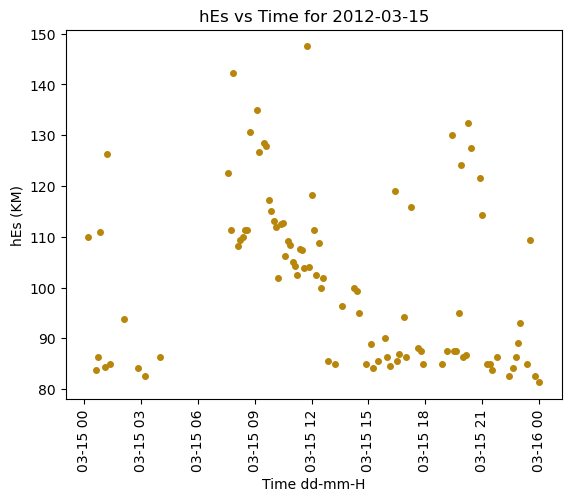

C:\Users\minod\AppData\Local\Temp\ipykernel_14720\968877237.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(timestamp_foEs, foEs, 'bo', color="midnightblue", markersize=4)


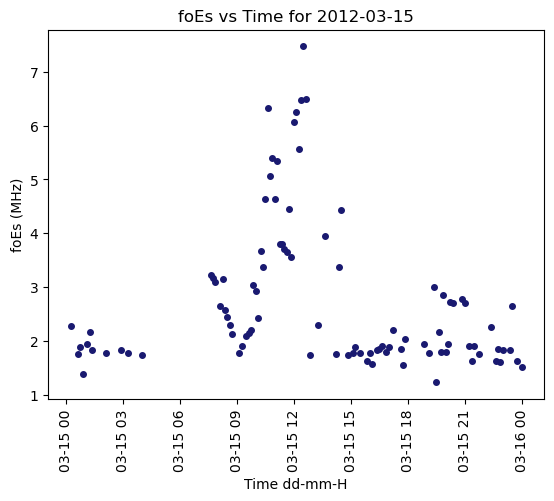

In [4]:
## Import stuff
import datetime
import numpy as np

def ionosonde_plotter(f):
    # Define timestamp array
    timestamp_full = []

    # Minimum virtual height of E trace
    hE = []
    timestamp_hE = []
    # Minimum virtual height of Es trace
    hEs = []
    timestamp_hEs = []

    # Define CS array
    CS = []

    # E layer critical frequency
    foE =[]
    timestamp_foE = []
    # Es layer critical frequency
    foEs = []
    timestamp_foEs = []


    # Define filename
    filename = f + ".txt"

    # define indices for each parameter of file
    time_idx = 0
    CS_idx = 1
    foEs_idx = 2
    foE_idx = 4
    hE_idx = 6
    hEs_idx = 8

    # Define format for datetime
    format = "%Y-%m-%dT%H:%M:%S.%fZ"

    # Open file - read
    fp = open(filename, 'r')
    # Read every line in file
    for line in fp:
    # Skip comments
        if line[0] == "#":
            continue
    # Strip lines
        else:
            line_strip = line.strip()
    # Split lines into lists
            line_split = line.split()

            foE_str = line_split[foE_idx]
            foEs_str = line_split[foEs_idx]
            hE_str = line_split[hE_idx]
            hEs_str = line_split[hEs_idx]

            timestamp_full.append(datetime.datetime.strptime(line_split[time_idx], format))

            # Check if can convert foE to float
            try:
                foE_float = float(foE_str)
                # If successful, append to the array
                foE.append(foE_float)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_foE.append(datetime.datetime.strptime(timestamp_str, format))
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if can convert foEs to float
            try:
                foEs_float = float(foEs_str)
                # If successful, append to the array
                foEs.append(foEs_float)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_foEs.append(datetime.datetime.strptime(timestamp_str, format))
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if hE can convert to float
            try:
                hE_float = float(hE_str)
                # If successful, append to the array
                hE.append(hE_float)
                # Extract timestamp and append to the array
                timestamp_strhE = line_split[time_idx]
                timestamp_hE.append(datetime.datetime.strptime(timestamp_strhE, format))
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if hEs can convert to float
            try:
                hEs_float = float(hEs_str)
                # If successful, append to the array
                hEs.append(hEs_float)
                # Extract timestamp and append to the array
                timestamp_strhEs = line_split[time_idx]
                timestamp_hEs.append(datetime.datetime.strptime(timestamp_strhEs, format))
            except ValueError:
                # If the conversion fails, ignore the line
                pass



    #print("Number of hE height data lines:", len(hE))
    print("Number of foE data lines:", len(foE))
    print("Number of timestamp_foE data lines:", len(timestamp_foE))
    print("Number of foEs data lines:", len(foEs))
    print("Number of timestamp_foEs data lines:", len(timestamp_foEs))
    print("Number of hE data lines:", len(hE))
    print("Number of timestamp_hE data lines:", len(timestamp_hE))
    print("Number of hEs data lines:", len(hEs))
    print("Number of timestamp_hEs data lines:", len(timestamp_hEs))
    print("Number of FULL timestamp data lines: ", len(timestamp_full))
    print(len(foE), len(timestamp_foE))
    print(len(hE), len(timestamp_hE))
    print(hE[2], timestamp_hE[2])

    #print("Lowest height found:", min(hE))
    print("Type of data of hE:", type(foE[1]))

    # Close file
    fp.close()
    
    import matplotlib.pyplot as plt

    plt.plot(timestamp_hEs, hEs, 'bo', color="darkgoldenrod", markersize=4)

    plt.title("hEs vs Time for {date}".format(date = f))
    plt.ylabel("hEs (KM)")
    plt.xlabel("Time dd-mm-H")
    plt.xticks(rotation=90)

    plt.show()
    
    plt.plot(timestamp_foEs, foEs, 'bo', color="midnightblue", markersize=4)

    plt.title("foEs vs Time for {date}".format(date=f))
    plt.ylabel("foEs (MHz)")
    plt.xlabel("Time dd-mm-H")
    plt.xticks(rotation=90)

    plt.show()
    
    
ionosonde_plotter("2012-03-15")